In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

warnings.simplefilter('ignore')
%matplotlib inline

In [3]:
data = pd.read_json("trip_users.json")
data.iloc[:5,[2,3,5,6,7]]

,level,rate,uid,user,user_year
0,2,40,9B592366185F025D11207926A19C615A,Honeygurl385,2015
1,5,50,DE44459A99806E4FF719F7B8894E0A28,Sordnaxela,2006
2,none,50,489FFEBDAE39F3B624289100C6FC9AC4,lorifX8088AW,2017
3,6,30,53914737C20758B841D5356ED067D5B1,roryjdoyle,2013
4,2,30,F672B733EA52AE5DD4A441BB0AE6D043,jepisco,2012


In [15]:
print(json.dumps(data['count'][3], indent=4))

{
    "city": "173",
    "contribution": "710",
    "vote": "279",
    "photo": "223"
}


In [12]:
print(json.dumps(data['review'][0], indent=4))

{
    "tool": "mobile",
    "title": "Just what we needed",
    "date": "15 August 2017",
    "cnt": "We arrived straight off a 14 hour flight and were happy to be allowed straight into our room. The room was large and clean and lovely. What we also loved was how close this was to the main attractions on Sentosa like the water park,"
}


In [16]:
print(json.dumps(data['distribution'][0], indent=4))

{
    "Very good": "5",
    "Average": "1",
    "Poor": "0",
    "Terrible": "0",
    "Excellent": "1"
}


In [25]:
data['rate'].value_counts()

40    616
30    451
50    354
20    182
10    156
Name: rate, dtype: int64

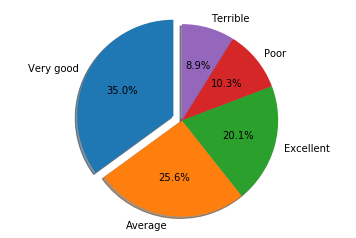

In [26]:
labels = ['Very good','Average','Excellent','Poor','Terrible']
sizes = data['rate'].value_counts().tolist()
explode = (0.1, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [46]:
data.level[data.level == "none"] = '0'
data.level = pd.to_numeric(data.level, errors='coerce')

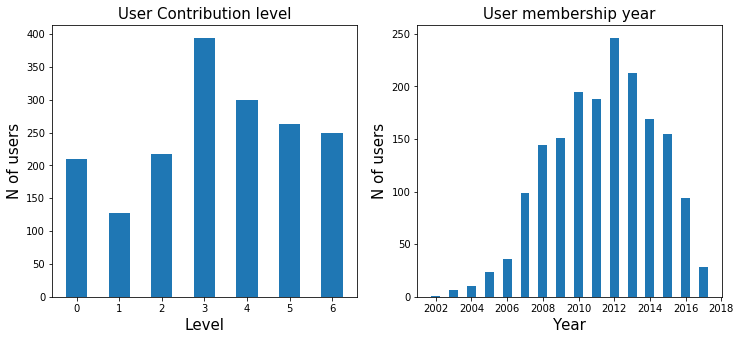

In [58]:
cnt = data['level'].value_counts()
y1 = cnt.values
x1 = cnt.index

cnt = data['user_year'].value_counts()
y2 = cnt.values
x2 = cnt.index

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(x1, y1, width = 0.5)
plt.ylabel('N of users', fontsize=15)
plt.xlabel('Level', fontsize=15)
plt.title('User Contribution level', fontsize=15)

plt.subplot(1, 2, 2)
plt.bar(x2, y2, width = 0.5)
plt.ylabel('N of users', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.title('User membership year', fontsize=15)

plt.show()

In [8]:
date_all = [rev['date'] for rev in data['review']]
date_all[:5]

['15 August 2017',
 '19 February 2017',
 '14 August 2017',
 '13 August 2017',
 '11 August 2017']

In [21]:
from datetime import datetime

date2 = [datetime.strptime(x, "%d %B %Y") for x in date_all]
print(date2[:3])
print(max(date2))
print(min(date2))

[datetime.datetime(2017, 8, 15, 0, 0), datetime.datetime(2017, 2, 19, 0, 0), datetime.datetime(2017, 8, 14, 0, 0)]
2017-08-15 00:00:00
2010-01-28 00:00:00


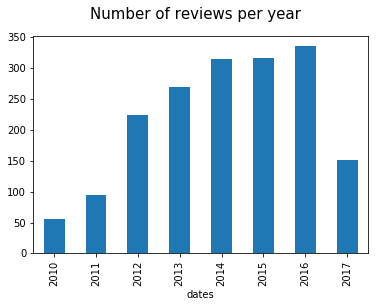

In [41]:
df = pd.DataFrame({'dates':date2})
df.dates = pd.to_datetime(df.dates)

# number of reviews per year
df.groupby(df.dates.dt.year).count().plot(kind='bar', legend=False)
plt.suptitle("Number of reviews per year", fontsize=15)
plt.show()

In [33]:
# generate a new column
data['rating'] = "good"
data.ix[data.rate<40, "rating"] = "bad"

data.rating.value_counts()

good    970
bad     789
Name: rating, dtype: int64

In [40]:
# prepare data
df = pd.DataFrame(data['count'].tolist())
df.head(5)
# decision tree


,city,contribution,photo,vote
0,3,7,3,0
1,71,52,0,160
2,1,1,0,0
3,173,710,223,279
4,2,5,0,0
